# 1 

In [57]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('resources/image.jpg')

In [56]:
from ..utils import show

ImportError: attempted relative import with no known parent package

In [40]:
import cv2
import matplotlib.pyplot as plt

def convertToBgr(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

def show(image, convert_to_bgr=False):
    if(convert_to_bgr):
        image = convertToBgr(image)

    plt.imshow(image)
    plt.axis('off') 
    plt.show()  

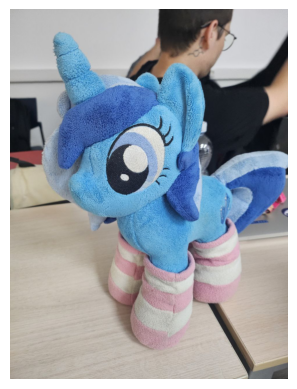

In [54]:
show(img, True)

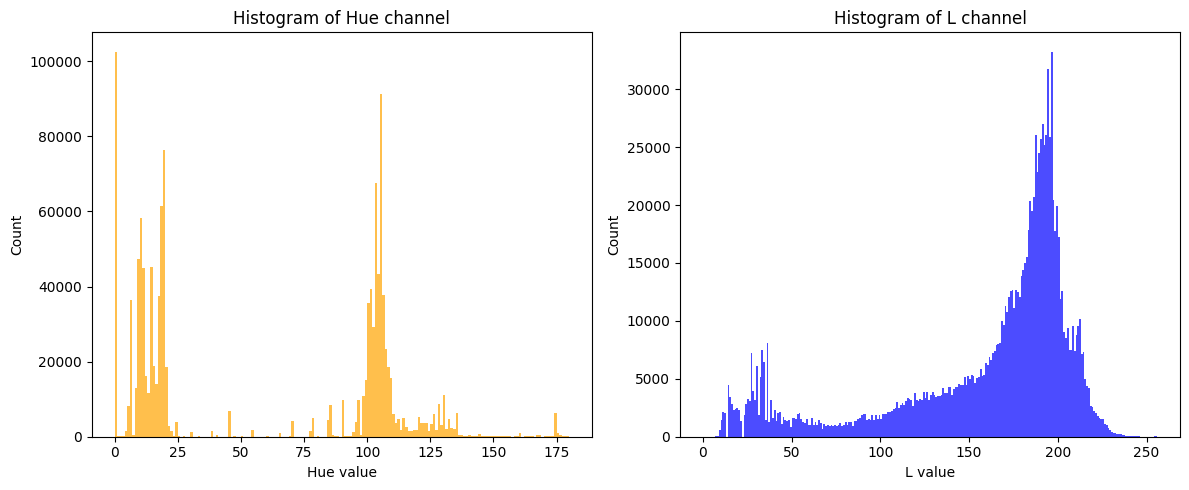

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('resources/image.jpg')

img = convertToBgr(img)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

hue_channel = hsv[:, :, 0]
l_channel = lab[:, :, 0]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(hue_channel.ravel(), bins=180, range=(0, 180), color='orange', alpha=0.7)
plt.title('Histogram of Hue channel')
plt.xlabel('Hue value')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(l_channel.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
plt.title('Histogram of L channel')
plt.xlabel('L value')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# 2

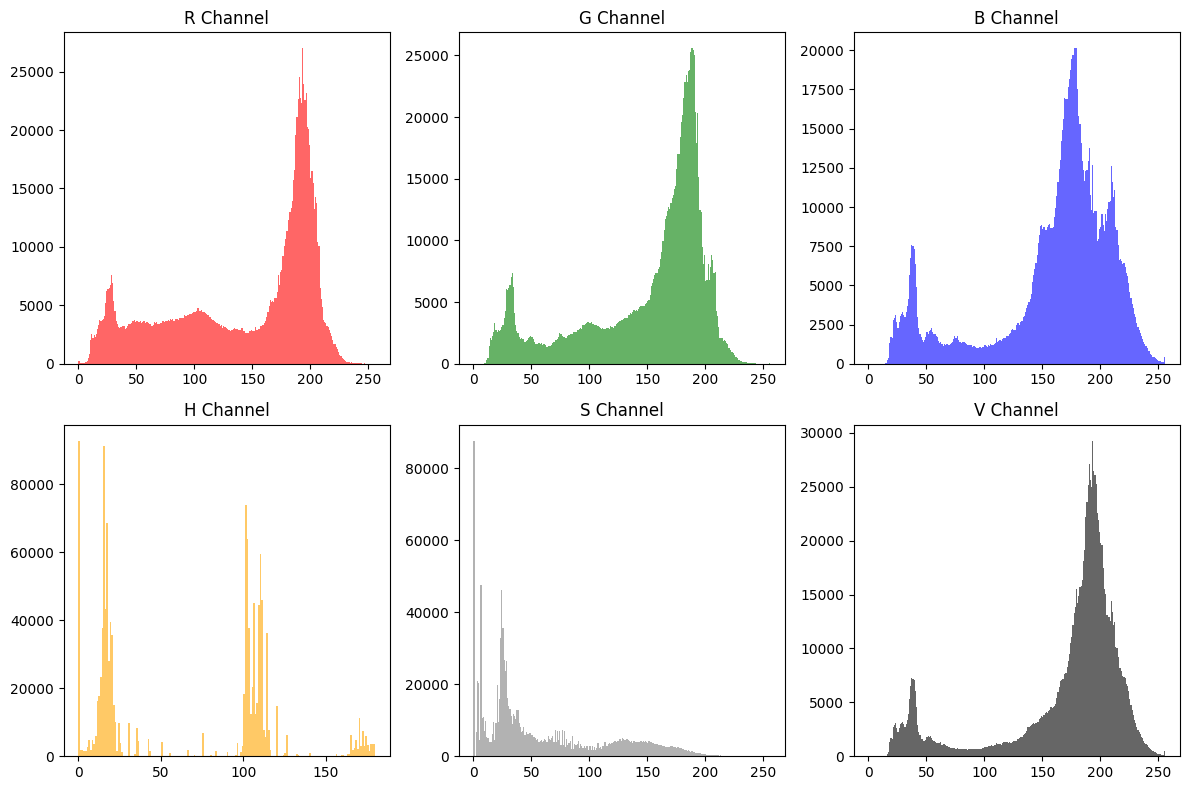

In [44]:
import cv2
import matplotlib.pyplot as plt

# 1. Считываем изображение (BGR по умолчанию)
img_bgr = cv2.imread("resources/image.jpg")

# 2. Преобразуем BGR -> RGB
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Разделяем каналы RGB
r_channel, g_channel, b_channel = cv2.split(img_rgb)

# 3. Преобразуем BGR -> HSV
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

# Разделяем каналы HSV
h_channel, s_channel, v_channel = cv2.split(img_hsv)

# Создаём фигуру: 2 строки, 3 столбца
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# --- Гистограммы для RGB ---
# R
axes[0, 0].hist(r_channel.ravel(), bins=256, range=(0, 256), color='red', alpha=0.6)
axes[0, 0].set_title('R Channel')

# G
axes[0, 1].hist(g_channel.ravel(), bins=256, range=(0, 256), color='green', alpha=0.6)
axes[0, 1].set_title('G Channel')

# B
axes[0, 2].hist(b_channel.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.6)
axes[0, 2].set_title('B Channel')

# --- Гистограммы для HSV ---
# H (в OpenCV диапазон H [0..179])
axes[1, 0].hist(h_channel.ravel(), bins=180, range=(0, 180), color='orange', alpha=0.6)
axes[1, 0].set_title('H Channel')

# S (Saturation) и V (Value) [0..255]
axes[1, 1].hist(s_channel.ravel(), bins=256, range=(0, 256), color='gray', alpha=0.6)
axes[1, 1].set_title('S Channel')

axes[1, 2].hist(v_channel.ravel(), bins=256, range=(0, 256), color='black', alpha=0.6)
axes[1, 2].set_title('V Channel')

plt.tight_layout()
plt.show()

# 3

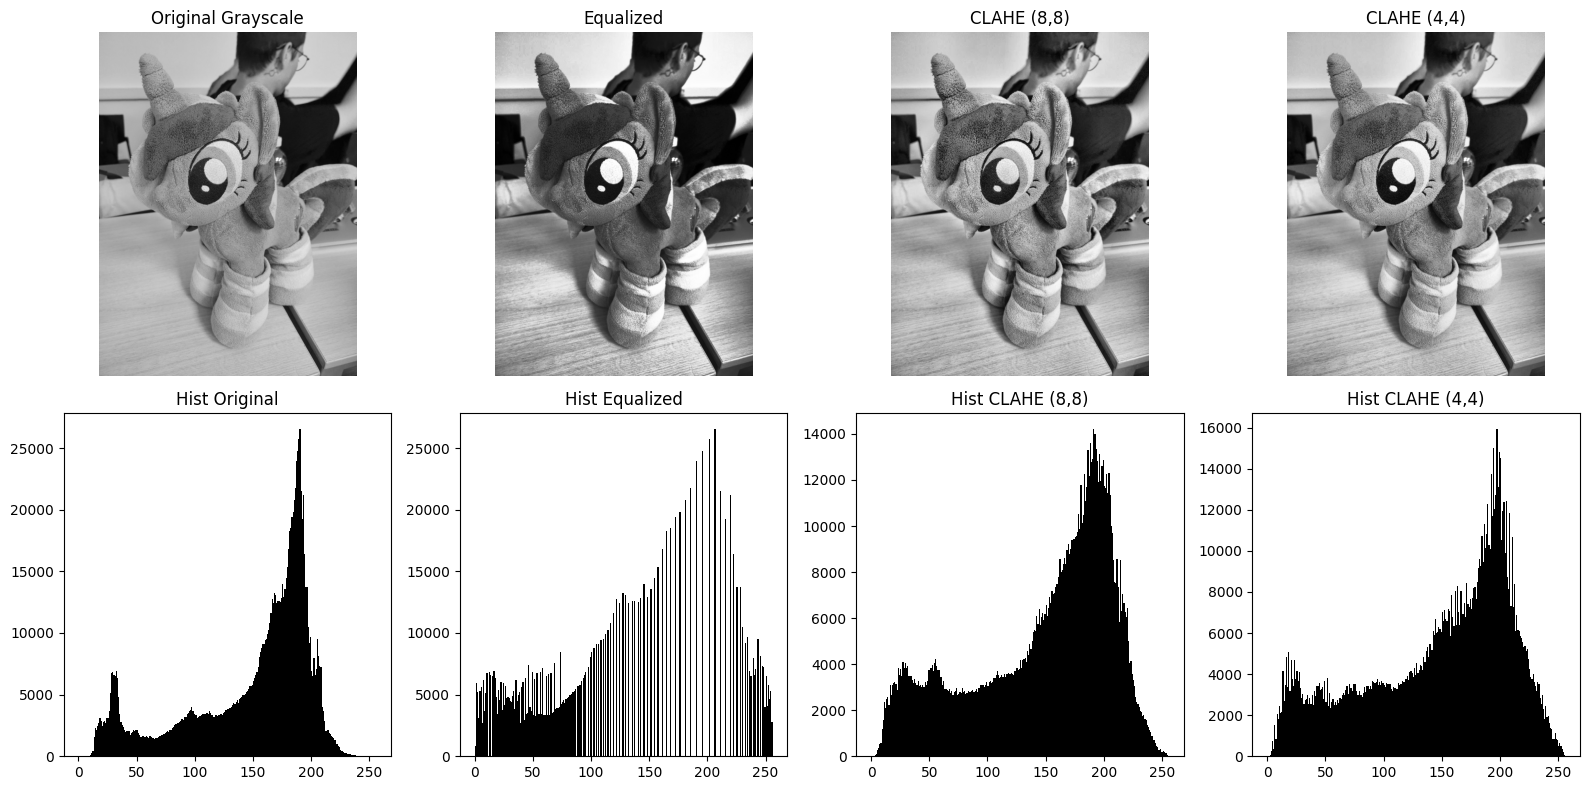

In [46]:
import cv2
import matplotlib.pyplot as plt

# 1. Считываем изображение в градациях серого
img_gray = cv2.imread("resources/image.jpg", cv2.IMREAD_GRAYSCALE)

# Проверка, что изображение считалось корректно
if img_gray is None:
    raise FileNotFoundError("Не удалось считать изображение. Проверьте путь к файлу.")

# 2. Гистограмма исходного изображения
# (Построим её вместе с другими, см. ниже)

# 3. Глобальное выравнивание гистограммы
img_equalized = cv2.equalizeHist(img_gray)

# 4. Локальное выравнивание CLAHE
#    4.1 clipLimit=2.0, tileGridSize=(8,8)
clahe_1 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
img_clahe_1 = clahe_1.apply(img_gray)

#    4.2 clipLimit=2.0, tileGridSize=(4,4)
clahe_2 = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4, 4))
img_clahe_2 = clahe_2.apply(img_gray)

# 5. Отображение результатов и гистограмм
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# ----- Верхний ряд: изображения -----
# Исходное
axes[0, 0].imshow(img_gray, cmap='gray')
axes[0, 0].set_title("Original Grayscale")
axes[0, 0].axis('off')

# EqualizeHist
axes[0, 1].imshow(img_equalized, cmap='gray')
axes[0, 1].set_title("Equalized")
axes[0, 1].axis('off')

# CLAHE (tileGridSize=(8,8))
axes[0, 2].imshow(img_clahe_1, cmap='gray')
axes[0, 2].set_title("CLAHE (8,8)")
axes[0, 2].axis('off')

# CLAHE (tileGridSize=(4,4))
axes[0, 3].imshow(img_clahe_2, cmap='gray')
axes[0, 3].set_title("CLAHE (4,4)")
axes[0, 3].axis('off')

# ----- Нижний ряд: гистограммы -----
# Гистограмма исходного изображения
axes[1, 0].hist(img_gray.ravel(), bins=256, range=(0, 256), color='black')
axes[1, 0].set_title("Hist Original")

# Гистограмма после EqualizeHist
axes[1, 1].hist(img_equalized.ravel(), bins=256, range=(0, 256), color='black')
axes[1, 1].set_title("Hist Equalized")

# Гистограмма после CLAHE (8,8)
axes[1, 2].hist(img_clahe_1.ravel(), bins=256, range=(0, 256), color='black')
axes[1, 2].set_title("Hist CLAHE (8,8)")

# Гистограмма после CLAHE (4,4)
axes[1, 3].hist(img_clahe_2.ravel(), bins=256, range=(0, 256), color='black')
axes[1, 3].set_title("Hist CLAHE (4,4)")

plt.tight_layout()
plt.show()

# 4

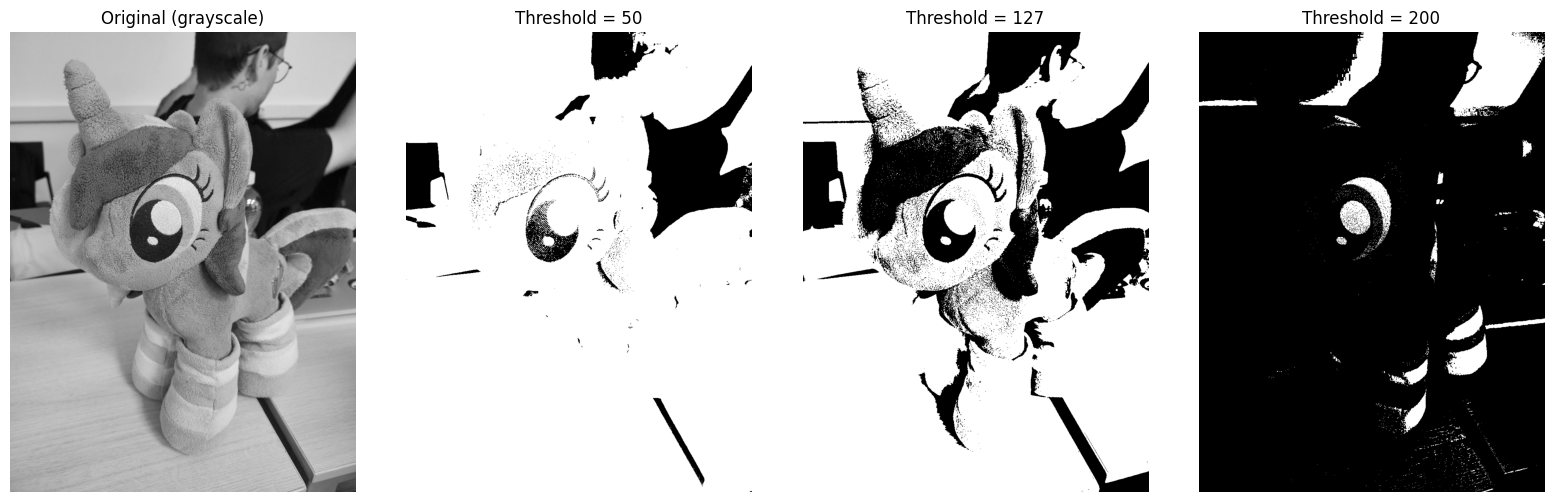

In [47]:
import cv2
import matplotlib.pyplot as plt

# 1. Считываем изображение (BGR) и переводим в градации серого
img_bgr = cv2.imread("resources/image.jpg")
if img_bgr is None:
    raise FileNotFoundError("Не удалось считать изображение. Проверьте путь к файлу.")

img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

# 2. Пороговая обработка с тремя разными порогами
thresholds = [50, 127, 200]
binary_images = []

for t in thresholds:
    _, binary = cv2.threshold(img_gray, t, 255, cv2.THRESH_BINARY)
    binary_images.append(binary)

# 3. Отображаем результаты
fig, axes = plt.subplots(1, 4, figsize=(16, 5))

axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title("Original (grayscale)")
axes[0].axis('off')

for i, (t, bin_img) in enumerate(zip(thresholds, binary_images), start=1):
    axes[i].imshow(bin_img, cmap='gray')
    axes[i].set_title(f"Threshold = {t}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# 5

Otsu threshold value: 121.0


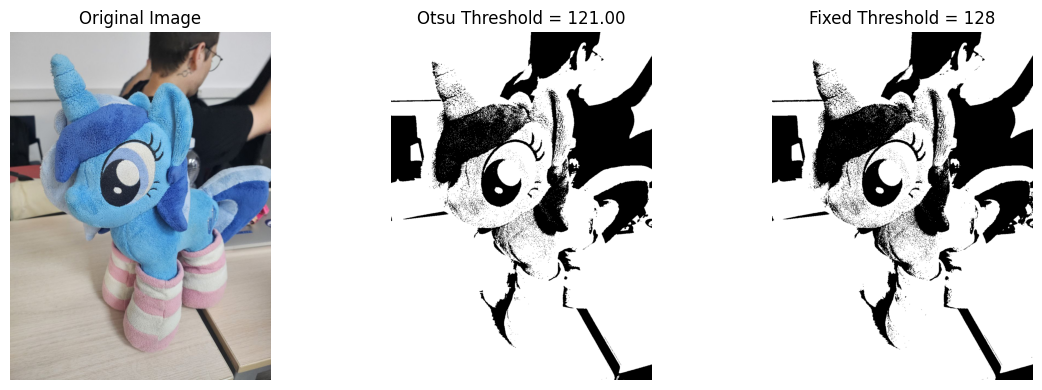

In [48]:
import cv2
import matplotlib.pyplot as plt

# 1. Считываем цветное изображение
img = cv2.imread("resources/image.jpg")  # Замените на путь к вашему изображению

# 2. Преобразуем его в градации серого
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 3. Применяем метод Оцу для автоматического порога
# cv2.THRESH_BINARY + cv2.THRESH_OTSU означает,
# что OpenCV сам найдёт "лучший" порог по методу Оцу
otsu_threshold_value, otsu_binary = cv2.threshold(
    gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

print("Otsu threshold value:", otsu_threshold_value)

# 4. Сравниваем результат с порогом из задания 4 (например, фиксированным порогом = 128)
fixed_threshold_value = 128
_, fixed_binary = cv2.threshold(gray, fixed_threshold_value, 255, cv2.THRESH_BINARY)

# Визуализируем результаты
plt.figure(figsize=(12, 4))

# Исходное изображение (в цвете)
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Результат применения метода Оцу
plt.subplot(1, 3, 2)
plt.imshow(otsu_binary, cmap="gray")
plt.title(f"Otsu Threshold = {otsu_threshold_value:.2f}")
plt.axis("off")

# Результат бинаризации с фиксированным порогом
plt.subplot(1, 3, 3)
plt.imshow(fixed_binary, cmap="gray")
plt.title(f"Fixed Threshold = {fixed_threshold_value}")
plt.axis("off")

plt.tight_layout()
plt.show()


# 6

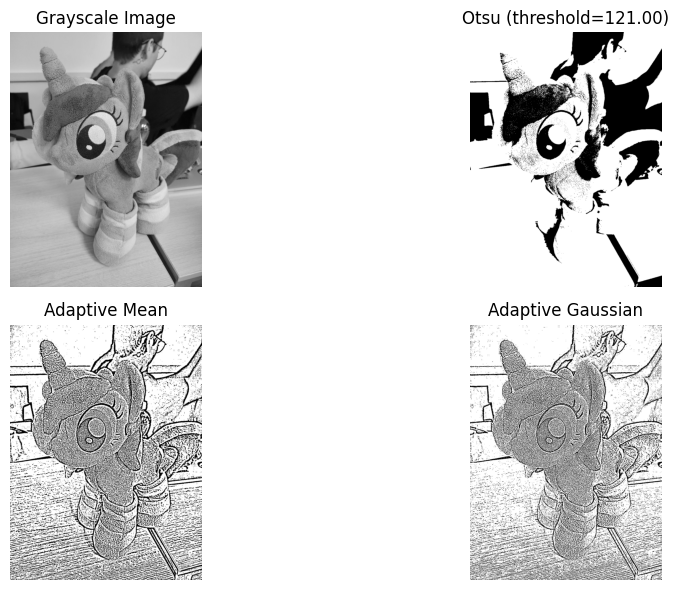

In [50]:
import cv2
import matplotlib.pyplot as plt

# 1. Считываем цветное изображение
img = cv2.imread("resources/image.jpg")  # Замените на путь к вашему изображению
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2. Применяем метод Оцу (вспомогательно, для сравнения)
otsu_threshold_value, otsu_binary = cv2.threshold(
    gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

# 3. Применяем адаптивную пороговую обработку

# 3.1. Адаптивный метод MEAN_C
# blockSize = 11 - размер области, на которой вычисляется среднее
# C = 2 - константа, вычитающаяся из среднего
adaptive_mean = cv2.adaptiveThreshold(
    gray, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY,
    blockSize=11,
    C=2
)

# 3.2. Адаптивный метод GAUSSIAN_C
adaptive_gaussian = cv2.adaptiveThreshold(
    gray, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY,
    blockSize=11,
    C=2
)

# 4. Сравниваем визуально результаты
plt.figure(figsize=(12, 6))

# Исходное изображение (серое)
plt.subplot(2, 2, 1)
plt.imshow(gray, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")

# Результат метода Оцу
plt.subplot(2, 2, 2)
plt.imshow(otsu_binary, cmap="gray")
plt.title(f"Otsu (threshold={otsu_threshold_value:.2f})")
plt.axis("off")

# Адаптивная пороговая обработка (MEAN_C)
plt.subplot(2, 2, 3)
plt.imshow(adaptive_mean, cmap="gray")
plt.title("Adaptive Mean")
plt.axis("off")

# Адаптивная пороговая обработка (GAUSSIAN_C)
plt.subplot(2, 2, 4)
plt.imshow(adaptive_gaussian, cmap="gray")
plt.title("Adaptive Gaussian")
plt.axis("off")

plt.tight_layout()
plt.show()


# 7

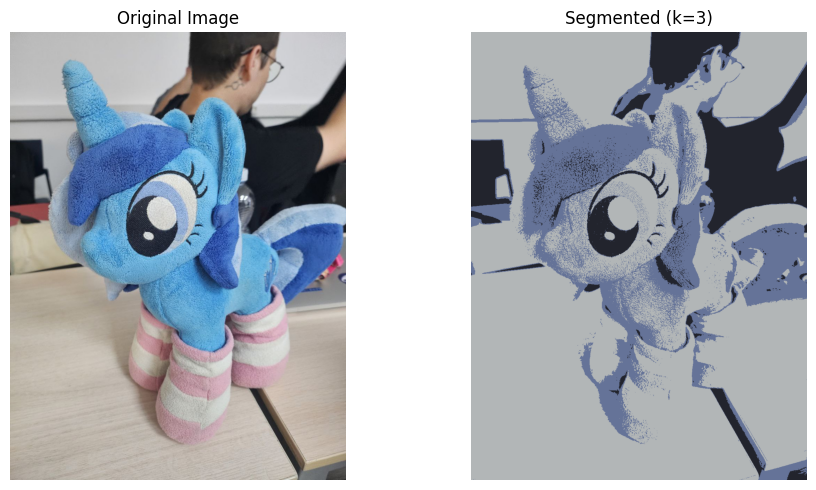

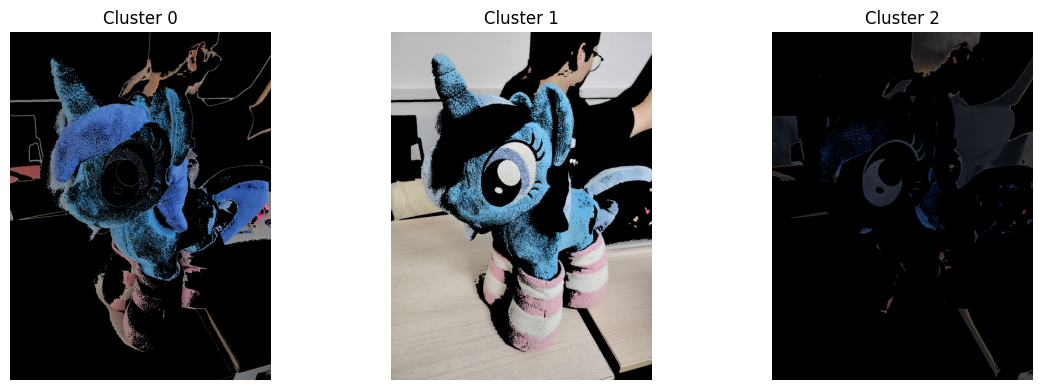

In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === 1. Считываем изображение и переводим в LAB ===
# Замените путь 'image.jpg' на путь к вашему файлу
img_bgr = cv2.imread('resources/image.jpg')
if img_bgr is None:
    raise FileNotFoundError("Изображение не найдено. Убедитесь, что путь указан верно.")

# Перевод из BGR (формат OpenCV) в LAB
img_lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)

# Извлекаем размеры исходного изображения
h, w, c = img_lab.shape  # h, w – высота, ширина; c = 3 (каналы LAB)

# === 2. Готовим данные для k-means ===
# Превращаем изображение в массив пикселей вида (количество_пикселей, 3)
# и приводим к типу float32, как это требует OpenCV для cv2.kmeans
pixel_vals = img_lab.reshape((-1, 3))
pixel_vals = np.float32(pixel_vals)

# Настраиваем критерии останова для k-means
# (количество итераций = 10, точность = 1.0)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

k = 3  # количество кластеров
attempts = 10  # число запусков алгоритма с разными начальными центроидами

# Запускаем k-means (используем RANDOM_CENTERS для наглядности)
ret, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)

# centers – это найденные центры кластеров в пространстве LAB
# labels – это метка кластера для каждого пикселя

# Преобразуем найденные центры обратно к uint8,
# чтобы можно было "раскрасить" изображение
centers = np.uint8(centers)

# Заменяем цвет каждого пикселя (в пространстве LAB) на цвет его кластера (центра)
segmented_data = centers[labels.flatten()]  # каждая метка labels[i] – номер кластера

# Возвращаемся к размеру (h, w, 3)
segmented_img_lab = segmented_data.reshape((h, w, 3))

# Переводим результат обратно в BGR, чтобы корректно отобразить через OpenCV/Matplotlib
segmented_img_bgr = cv2.cvtColor(segmented_img_lab, cv2.COLOR_LAB2BGR)

# === 3. Визуализируем результат кластеризации ===

# 3.1. Показываем исходное изображение и результат
plt.figure(figsize=(10, 5))

# Исходное изображение (переведём в RGB для корректного отображения в Matplotlib)
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Результат сегментации (также переводим в RGB)
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(segmented_img_bgr, cv2.COLOR_BGR2RGB))
plt.title(f'Segmented (k={k})')
plt.axis('off')

plt.tight_layout()
plt.show()

# 3.2. (Необязательный шаг) Визуализируем каждую «область» (кластер) отдельно
# Создадим маску для каждого кластера и отобразим только пиксели,
# принадлежащие соответствующему кластеру

labels_2d = labels.reshape((h, w))  # Извлечём метки кластера в двумерную форму

plt.figure(figsize=(12, 4))
for cluster_id in range(k):
    # Создаём маску для пикселей, где labels == cluster_id
    cluster_mask = (labels_2d == cluster_id)
    
    # Создаём пустое изображение (того же размера)
    cluster_img = np.zeros_like(img_bgr)  # по умолчанию все пиксели = 0
    
    # Заполняем только те пиксели, которые принадлежат кластеру cluster_id,
    # исходными значениями
    cluster_img[cluster_mask] = img_bgr[cluster_mask]
    
    # Отображаем
    plt.subplot(1, k, cluster_id + 1)
    plt.imshow(cv2.cvtColor(cluster_img, cv2.COLOR_BGR2RGB))
    plt.title(f"Cluster {cluster_id}")
    plt.axis('off')

plt.tight_layout()
plt.show()
